In [1]:
import pandas as pd
import requests
import numpy as np
import json
import codecs
import matplotlib.pyplot as plt

In [2]:
token = []
stemmed_token = []
segmented_sentence = []

for x in range (1,21):
    file_name = '../results/Python StackOverflow/' + str(x) + '.json'
    with open(file_name, 'r', encoding='utf-16') as json_file:
        data = json.load(json_file)
        for y in data['token']:
            token.append(y)
        for z in data['stemmed_token']:
            stemmed_token.append(z)
        for a in data['segmented_sentence']:
            segmented_sentence.append(a)

tokens = list(set(token))
stemmed_tokens = list(set(stemmed_token))
            
df_token = pd.DataFrame(
    {
        "token": tokens 
    }
)

df_stemmed_token = pd.DataFrame(
    {
        "stemmed_token": stemmed_tokens
    }
)


In [3]:
token_dict = dict.fromkeys(tokens, 0)
stemmed_token_dict = dict.fromkeys(stemmed_tokens, 0)

for sentence in segmented_sentence:
    for token in tokens:
        counted_token = sentence.count(token)
        token_dict[token]+=counted_token
    for stemmed_token in stemmed_tokens:
        counted_stemmed_token = sentence.count(stemmed_token)
        stemmed_token_dict[stemmed_token] += counted_stemmed_token

df_token['count_token'] = df_token['token'].map(token_dict)

df_stemmed_token['count_stemmed_token'] = df_stemmed_token['stemmed_token'].map(stemmed_token_dict)

In [4]:
token_sorted_values = df_token.sort_values(by=['count_token'], ascending=False)
hundred_token_sorted_values = token_sorted_values['token'].head(100).tolist()
# token_sorted_values.head(100)

In [5]:
stemmed_token_sorted_values = df_stemmed_token.sort_values(by=['count_stemmed_token'], ascending=False)
hundred_stemmed_token_sorted_values = stemmed_token_sorted_values['stemmed_token'].head(100).tolist()
# stemmed_token_sorted_values.head(100)

In [6]:
#Percentage existence of tokens also in stemmed tokens
set_token = set(hundred_token_sorted_values)
set_stemmed_token = set(hundred_stemmed_token_sorted_values)
intersection_of_token = set_token.intersection(set_stemmed_token)
print("Stemmed Token of Top 100 that is part of Token of Top 100")
print(len(intersection_of_token)/len(hundred_token_sorted_values))

Stemmed Token of Top 100 that is part of Token of Top 100
0.9


In [7]:
set_tokens = set(tokens)
set_stemmed_tokens = set(stemmed_tokens)
reduced_tokens = set_tokens - set_stemmed_tokens
print("Reduced_tokens divided by Set of tokens")
len(reduced_tokens)/len(set_tokens)

Reduced_tokens divided by Set of tokens


0.6400118906064209

In [8]:
length_token = 0
length_of_token = []
for x in tokens:
    if (len(x)>length_token):
        length_token = len(x)
    
for x in range(1, length_token+1):
    length_of_token.append(x)
    
df_length_of_token = pd.DataFrame(
    {
        "length": length_of_token
    })

length_of_token_dict = dict.fromkeys(length_of_token, 0)

for x in tokens:
    if(len(x)) > 25:
        print(x)
    length_of_token_dict[len(x)] += 1

df_length_of_token['count'] = df_length_of_token['length'].map(length_of_token_dict)

//pandas.pydata.org/pandas-docs/version/0.17.0/indexing.html
//gist.github.com/nikitakit/6ef3b72be67b86cb7868
tf.global_variables_initializer
template_folder='web/templates
'./tensorflow/python/tools
//www.tensorflow.org/versions/r2.0/api_docs/python/tf/keras/models/save_model
//www.tensorflow.org/versions/r2.0/api_docs/python/tf/keras/models/load_model
//www.python.org/dev/peps/pep-0484/
DynamicFieldsModelSerializer
enctype=multipart/form-data
//medium.com/octopus-wealth/returning-json-from-flask-cf4ce6fe9aeb
HyperlinkedModelSerializer
graph.get_operation_by_name
//docs.djangoproject.com/en/3.0/topics/db/models/
tf.train.import_meta_graph
//www.tensorflow.org/programmers_guide/meta_graph
//docs.djangoproject.com/en/3.0/topics/forms/modelforms/
//bytes.com/topic/python/answers/464012-objects-list-index
//github.com/guillaume-chevalier/LSTM-Human-Activity-Recognition
tf.saved_model.loader.load
//keras.io/layers/normalization/
//www.tensorflow.org/guide/saved_model
//example.com/static/f

In [9]:
print("Row that has highest count")
df_length_of_token['count'].argmax()


Row that has highest count


6

In [10]:
print("Row that has highest count")
df_length_of_token.loc[[6]]

Row that has highest count


,length,count
6,7,446


In [11]:
df_length_of_token.tail()

,length,count
79,80,0
80,81,0
81,82,0
82,83,0
83,84,1


In [12]:
length_stemmed_token = 0
length_of_stemmed_token = []
for x in stemmed_tokens:
    if (len(x)>length_stemmed_token):
        length_stemmed_token = len(x)
    
for y in range(1, length_stemmed_token+1):
    length_of_stemmed_token.append(y)
    
df_length_of_stemmed_token = pd.DataFrame(
    {
        "length": length_of_stemmed_token
    })

length_of_stemmed_token_dict = dict.fromkeys(length_of_stemmed_token, 0)

for z in stemmed_tokens:
    length_of_stemmed_token_dict[len(z)] += 1

df_length_of_stemmed_token['count'] = df_length_of_stemmed_token['length'].map(length_of_stemmed_token_dict)

In [13]:
print("Row that has highest count")
df_length_of_stemmed_token['count'].argmax()


Row that has highest count


5

In [14]:
print("Row that has highest count")
df_length_of_stemmed_token.loc[[3]]

Row that has highest count


,length,count
3,4,357


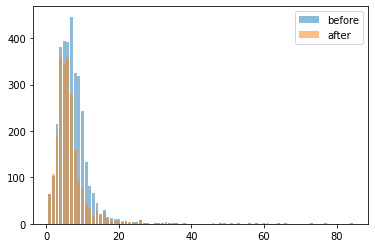

In [15]:
plt.bar(x=df_length_of_token['length'], height=df_length_of_token['count'], label='before', alpha=0.5)
plt.bar(x=df_length_of_stemmed_token['length'], height=df_length_of_stemmed_token['count'], label='after', alpha=0.5)
plt.legend(loc='upper right')
plt.show()

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178]
X axis: Length of a sentence in tokens. Y axis: Number of sentences that has this number of tokens
           length       count
count  178.000000  178.000000
mean    89.500000    5.483146
std     51.528309    7.25735

<BarContainer object of 178 artists>

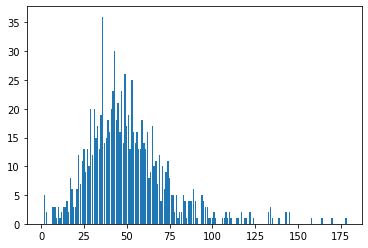

In [16]:
length_sentence_per_token = 0
length_of_sentence_per_token = []

for x in segmented_sentence:
    # Length per sentence using token
    length_per_sentence = 0
    for y in tokens:
        if y in x:
            length_per_sentence += 1
    if (length_per_sentence>length_sentence_per_token):
        length_sentence_per_token = length_per_sentence

for z in range(1, length_sentence_per_token+1):
    length_of_sentence_per_token.append(z)
    
print(length_of_sentence_per_token)
    
df_length_of_sentence = pd.DataFrame(
    {
        "length": length_of_sentence_per_token
    })

length_of_sentence_per_token_dict = dict.fromkeys(length_of_sentence_per_token, 0)

for s in segmented_sentence:
    length_per_sentence = 0
    for t in tokens:
        if t in s:
            length_per_sentence += 1
    length_of_sentence_per_token_dict[length_per_sentence] += 1

df_length_of_sentence['count'] = df_length_of_sentence['length'].map(length_of_sentence_per_token_dict)
print("X axis: Length of a sentence in tokens. Y axis: Number of sentences that has this number of tokens")
print(df_length_of_sentence.describe())
plt.bar(df_length_of_sentence['length'], df_length_of_sentence['count'])

In [17]:
print("Row that has highest count")
df_length_of_sentence['count'].argmax()

Row that has highest count


35

In [18]:
print("Highest count with the length of the tokens inside in the sentence")
df_length_of_sentence.loc[[35]]

Highest count with the length of the tokens inside in the sentence


,length,count
35,36,36
